<a href="https://colab.research.google.com/github/matusoff/Molecular_dynamics/blob/main/Bioinformatics_with_Biopython_and_Nglview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Bio
!pip Install SeqIO
import Bio
from Bio import PDB, SeqIO, SeqUtils, Align

import warnings
from Bio import BiopythonWarning
warnings.simplefilter('ignore', BiopythonWarning)

import matplotlib.pyplot as plt
import seaborn as sns
import os

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 12.4 MB/s eta 0:00:00


##Reading FASTA Files with Biopython

In [ ]:
hsp = SeqIO.read('/content/sample_data/rcsb_pdb_8DMY.fasta', 'fasta')
hsp

SeqRecord(seq=Seq('DEETTALVCDNGSGLVKAGFAGDDAPRAVFPSIVGRPRHQGVMVGMGQKDSYVG...KCF'), id='8DMY_1|Chains', name='8DMY_1|Chains', description='8DMY_1|Chains A, B, C, D|Actin, alpha cardiac muscle 1|Bos taurus (9913)', dbxrefs=[])

In [ ]:
fasta_data = SeqIO.parse('/content/sample_data/rcsb_pdb_8DMY.fasta', 'fasta')

seq_list = []
for entry in fasta_data:
    seq_list.append(entry.seq)

seq_list

[Seq('DEETTALVCDNGSGLVKAGFAGDDAPRAVFPSIVGRPRHQGVMVGMGQKDSYVG...KCF')]

##GC Content of Nucleotide Sequence

In [ ]:
DNA = SeqIO.parse('/content/sample_data/rcsb_pdb_8DMY.fasta', 'fasta')
hsp_seq = [x.seq for x in DNA]

SeqUtils.gc_fraction(*hsp_seq)

0.49137931034482757

##Nucleic Acids - Transcription, Translation, and Replication

In [ ]:
coding_DNA = Bio.Seq.Seq('GGAGAGTGACGCCGGCAGTCACACGCACAGGCTGCAGCAACGAAAGAT')
coding_DNA

Seq('GGAGAGTGACGCCGGCAGTCACACGCACAGGCTGCAGCAACGAAAGAT')

In [ ]:
mRNA = coding_DNA.transcribe()
mRNA

Seq('GGAGAGUGACGCCGGCAGUCACACGCACAGGCUGCAGCAACGAAAGAU')

In [ ]:
template_DNA = Bio.Seq.Seq('ATCTTTCGTTGCTGCAGCCTGTGCGTGTGACTGCCGGCGTCACTCTCC')
coding_DNA = template_DNA.reverse_complement()
coding_DNA.transcribe()

Seq('GGAGAGUGACGCCGGCAGUCACACGCACAGGCUGCAGCAACGAAAGAU')

In [ ]:
mRNA.translate()

Seq('GE*RRQSHAQAAATKD')

In [ ]:
mRNA.translate(to_stop=True)

Seq('GE')

##Sequence Alignment

In [ ]:
aligner = Align.PairwiseAligner(mode='global',
                                match_score=1,
                                mismatch_score=-1,
                                open_gap_score=-1,
                                extend_gap_score=-0.5)


In [ ]:
seq1 = 'GGAGAGTGACGCCGGCAGTCACACGCACAGGCTGCAGCAACGAAAAGTT'
seq2 = 'GGAGAGTGACGCCGGGCAGTCACACGCTCAGGCTGCAGCAACGAAAAAGTTA'

alignments = aligner.align(seq1, seq2)
len(alignments)

15

In [ ]:
print(alignments[0])

target            0 GGAGAGTGACGCC-GGCAGTCACACGCACAGGCTGCAGCAACG-AAAAGTT- 49
                  0 |||||||||||||-|||||||||||||.|||||||||||||||-|||||||- 52
query             0 GGAGAGTGACGCCGGGCAGTCACACGCTCAGGCTGCAGCAACGAAAAAGTTA 52



In [ ]:
score = aligner.score(seq1, seq2)
score

44.0

##Reading PDB Files with Python

In [ ]:
file = '/content/sample_data/8dmy.pdb'

data = []
with open(file, 'r') as f:
    for line in f:
        data.append(line)

In [ ]:
data[12180:12200]

['ATOM  11686  CZ  PHE D 375     128.561 129.718  96.415  1.00 98.70           C  \n',
 'ATOM  11687  OXT PHE D 375     130.359 132.609  90.404  1.00 86.91           O  \n',
 'TER   11688      PHE D 375                                                      \n',
 'HETATM11689  PB  ADP A 401     115.489  96.258 104.846  1.00 83.67           P  \n',
 'HETATM11690  O1B ADP A 401     115.147  96.621 103.422  1.00 61.88           O  \n',
 'HETATM11691  O2B ADP A 401     115.456  94.778 105.142  1.00 84.74           O  \n',
 'HETATM11692  O3B ADP A 401     114.802  97.117 105.882  1.00 82.12           O  \n',
 'HETATM11693  PA  ADP A 401     118.168  95.889 104.121  1.00 81.61           P  \n',
 'HETATM11694  O1A ADP A 401     117.483  95.184 102.977  1.00 82.66           O  \n',
 'HETATM11695  O2A ADP A 401     119.075  95.132 105.062  1.00 70.11           O  \n',
 'HETATM11696  O3A ADP A 401     117.043  96.654 104.982  1.00 80.21           O  \n',
 "HETATM11697  O5' ADP A 401     118.982  9

extract information about the
-sheets in the protein

In [ ]:
def get_sheet_direction(file):
    '''Accepts a PDB files path (string) and returns a list
    of values indicating if a strand starts a beta sheet (0),
    strand is parallel to the previous strand (1), or is
    antiparallel to the previous strand (-1).

     >>> ('1abc.pdb') -> [0, 1, 1, 1, -1]
    '''

    structure_list = []

    with open(file, 'r') as f:
        for line in f:
            if line.startswith('SHEET'):
                sense = int(line[38:40].strip())
                structure_list.append(sense)

    return structure_list

In [ ]:
sheet_sense = get_sheet_direction('/content/sample_data/8dmy.pdb')
print(sheet_sense)

[0, -1, -1, 1, 1, -1, 0, -1, -1, 0, -1, 0, -1, -1, 0, -1, -1, 1, 1, 0, -1, 0, -1, -1, 1, 1, -1, 0, -1, -1, 0, -1, 0, -1, -1, 0, -1, -1, 1, 1, 0, -1, 0, -1, -1, 1, 1, -1, 0, -1, -1, 0, -1, 0, -1, -1, 0, -1, -1, 1, 1, 0, -1, 0, -1, -1, 1, 1, -1, 0, -1, -1, 0, -1, 0, -1, -1, 0, -1, -1, 1, 1, 0, -1]


Text(0, 0.5, 'Count')

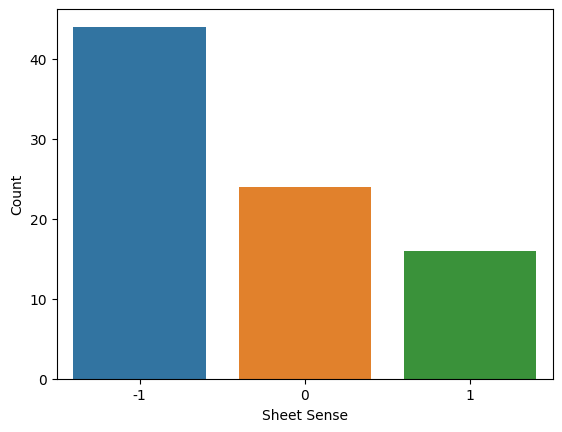

In [ ]:
sns.countplot(x=sheet_sense, order=[-1, 0, 1])

plt.xlabel('Sheet Sense')
plt.ylabel('Count')

##Reading Structural Files with Biopython

In [ ]:
parser = PDB.PDBParser()

In [ ]:
structure = parser.get_structure('8dmy', '/content/sample_data/8dmy.pdb')

In [ ]:
io = PDB.PDBIO()
io.set_structure(structure[0])
io.save('new_protein.pdb')

In [ ]:
io = PDB.MMCIFIO()
io.set_structure(structure[0])
io.save('8dmy.cif')

In [ ]:
parser = PDB.MMCIFParser()
structure = parser.get_structure('8dmy', '/content/8dmy.cif')

##Accessing Strands, Residues, and Atoms

In [ ]:
protein_model = structure[0]

In [ ]:
atoms = []
for chain in protein_model:
    for residue in chain:
        for atom in residue:
            atoms.append(atom)

atoms[:10]

[<Atom N>,
 <Atom CA>,
 <Atom C>,
 <Atom O>,
 <Atom CB>,
 <Atom CG>,
 <Atom OD1>,
 <Atom OD2>,
 <Atom N>,
 <Atom CA>]

In [ ]:
res_list = []
for residue in protein_model.get_residues():
    res_list.append(residue)

res_list[:10]

[<Residue ASP het=  resseq=2 icode= >,
 <Residue GLU het=  resseq=3 icode= >,
 <Residue GLU het=  resseq=4 icode= >,
 <Residue THR het=  resseq=5 icode= >,
 <Residue THR het=  resseq=6 icode= >,
 <Residue ALA het=  resseq=7 icode= >,
 <Residue LEU het=  resseq=8 icode= >,
 <Residue VAL het=  resseq=9 icode= >,
 <Residue CYS het=  resseq=10 icode= >,
 <Residue ASP het=  resseq=11 icode= >]

In [ ]:
for strand in protein_model:
    print(strand.get_id())

A
B
C
D


In [ ]:
strand_A = protein_model['A']
strand_A

<Chain id=A>

In [ ]:
residue_10 = strand_A[10]
residue_10

<Residue CYS het=  resseq=10 icode= >

In [ ]:
residue_10.get_unpacked_list()

[<Atom N>, <Atom CA>, <Atom C>, <Atom O>, <Atom CB>, <Atom SG>]

In [ ]:
for atom in residue_10:
    print(atom.get_id())

N
CA
C
O
CB
SG


In [ ]:
residue_10['CA']

<Atom CA>

##Attributes of Residues, and Atoms

In [ ]:
coords = []
for atom in protein_model.get_atoms():
    coords.append(atom.get_coord())

coords[:5]

[array([110.711,  68.081, 110.507], dtype=float32),
 array([109.27 ,  67.87 , 110.586], dtype=float32),
 array([108.677,  68.539, 111.822], dtype=float32),
 array([108.673,  69.766, 111.929], dtype=float32),
 array([108.946,  66.374, 110.592], dtype=float32)]

In [ ]:
ppb = PDB.PPBuilder()
peptides = ppb.build_peptides(structure[0])

peptides

[<Polypeptide start=2 end=72>,
 <Polypeptide start=74 end=375>,
 <Polypeptide start=2 end=72>,
 <Polypeptide start=74 end=375>,
 <Polypeptide start=3 end=72>,
 <Polypeptide start=74 end=375>,
 <Polypeptide start=3 end=72>,
 <Polypeptide start=74 end=375>]

In [ ]:
for strand in peptides:
    C_a = strand.get_theta_list()
    print(C_a[:5])

[1.5363310889489872, 1.5888409099823886, 1.7580832001936957, 1.7371085372634558, 2.077091698605215]
[2.0928076338990143, 1.9590432999652232, 1.7954388374791985, 1.928902637797498, 1.637256338262637]
[1.5363766023321446, 1.5887889316095125, 1.7584748170586877, 1.7373477840464908, 2.077493414441597]
[2.066198318414445, 2.0075821073175235, 1.7583965140992985, 1.9288975749576462, 1.637192959301164]
[1.5887784302154422, 1.7580586986079292, 1.7371102462796517, 2.0774114388380354, 2.220109378386339]
[2.091544367338781, 1.9580220572909488, 1.7954282096995646, 1.9289711203397482, 1.6373363315733853]
[1.513041689164331, 1.6487386742027128, 1.6100074366641215, 2.07748331559333, 2.2198407184250026]
[1.986531028959163, 1.9582505379259307, 1.795328837214457, 1.9289851275717522, 1.6373190425093902]


##Visualization of PDB

In [99]:
!pip install nglview
import nglview as nv

In [108]:
binding_prot = nv.show_pdbid('8dmy')
binding_prot

NGLWidget()

In [105]:
structure = parser.get_structure('8dmy', '/content/sample_data/8dmy.pdb')
prot_struct = nv.show_biopython(structure)
prot_struct

NGLWidget()

In [106]:
ballstick = nv.show_pdbid('8dmy')
ballstick.clear_representations()
ballstick.add_representation('ball+stick')
ballstick

NGLWidget()